<a href="https://colab.research.google.com/github/soheilpaper/-tft-2.4-ili9341-STM32/blob/master/Watermark%20remover/Organizing_Hyperparameter_Sweeps_in_PyTorch_with_W%26B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/soheilpaper/-tft-2.4-ili9341-STM32/blob/master/Watermark%20remover/Organizing_Hyperparameter_Sweeps_in_PyTorch_with_W%26B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
<!--- @wandbcode{sweeps-video} -->

<img src="https://wandb.me/logo-im-png" width="400" alt="Weights & Biases" />

<!--- @wandbcode{sweeps-video} -->

<div><img /></div>

<img src="https://wandb.me/mini-diagram" width="650" alt="Weights & Biases" />

<div><img /></div>

Finding a machine learning model that meets your desired metric (such as model accuracy) is normally a redundant task that can take multiple iterations. To make matters worse, it might be unclear which hyperparameter combinations to use for a given training run.

Use W&B Sweeps to create an organized and efficient way to automatically search through combinations of hyperparameter values such as the learning rate, batch size, number of hidden layers, optimizer type and more to find values that optimize your model based on your desired metric.

In this tutorial you will create a hyperparameter search with W&B PyTorch integration. Follow along with a [video tutorial](http://wandb.me/sweeps-video)!

![](https://i.imgur.com/WVKkMWw.png)

## Sweeps: An Overview

Running a hyperparameter sweep with Weights & Biases is very easy. There are just 3 simple steps:

1. **Define the sweep:** we do this by creating a dictionary or a [YAML file](https://docs.wandb.com/library/sweeps/configuration) that specifies the parameters to search through, the search strategy, the optimization metric et all.

2. **Initialize the sweep:** with one line of code we initialize the sweep and pass in the dictionary of sweep configurations:
`sweep_id = wandb.sweep(sweep_config)`

3. **Run the sweep agent:** also accomplished with one line of code, we call `wandb.agent()` and pass the `sweep_id` to run, along with a function that defines your model architecture and trains it:
`wandb.agent(sweep_id, function=train)`


## Before you get started

Install W&B and import the W&B Python SDK into your notebook:

1. Install with `!pip install`:

In [ ]:
!pip install wandb -Uq

2. Import W&B:

In [ ]:
import wandb

3. Log in to W&B and provide your API key when prompted:

In [ ]:
#wandb.login()
import wandb
wandb.login(key='22f2597b648c0fe02188c9eef60adfb0daa0728a')

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
# Install dependencies if needed:
# !pip install ultralytics wandb

import wandb
from ultralytics import YOLO
from wandb.integration.ultralytics import add_wandb_callback

# --- 1. Set up wandb project (optional, for custom config) ---
# wandb.login()  # Uncomment if running for the first time
# wandb.init(project="my-logo-detection", config={"epochs": 50, "imgsz": 640})

# --- 2. Load YOLOv8 model ---
# Use a pre-trained model for transfer learning, or your own checkpoint
model = YOLO("yolov8n.pt")  # Or 'path/to/your/custom_logo_model.pt'

# --- 3. Add wandb callback for experiment tracking, model checkpointing, and visualization ---
add_wandb_callback(model, enable_model_checkpointing=True)

# --- 4. Train/Fine-tune the model on your custom dataset ---
# Make sure your data.yaml is correctly set up and your dataset is in YOLO format
model.train(
    project="my-logo-detection",      # wandb project name
    data="path/to/data.yaml",         # path to your data.yaml file
    epochs=50,                        # number of epochs
    imgsz=640,                        # image size
    device=0,                         # set to 0 for CUDA, or 'cpu'
    batch=16,                         # adjust batch size as needed
    save=True,                        # save checkpoints
    resume=False                      # resume from last checkpoint if needed
)

# --- 5. Finish the wandb run (optional, especially in notebooks) ---
wandb.finish()

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


wandb: WARNING This integration is tested and supported for ultralytics v8.0.238 and below.
wandb: WARNING             Please report any issues to https://github.com/wandb/wandb/issues with the tag `yolov8`.


100%|██████████| 6.25M/6.25M [00:00<00:00, 112MB/s]


Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=path/to/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile

RuntimeError: Dataset 'path/to/data.yaml' error ❌ 'path/to/data.yaml' does not exist

#https://www.perplexity.ai/search/if-possible-see-this-code-and-iwg1EBJIS1qsPoOP.aXtsg#8

Yes, your code for **detecting and removing watermarks** can be adapted to help create a labeled dataset for YOLOv8 watermark detection. Instead of only removing the watermark, you can **save the detected bounding box as a YOLO label file** for each image, building a dataset automatically. This approach is commonly used in dataset bootstrapping, especially when manual annotation is expensive or slow[1][3][4][5].

Below is a **modified version of your code** that:
- Detects the watermark/logo region in each image
- Saves a YOLO-format `.txt` label file for each image (with bounding box)
- Optionally also saves the mask for visual verification

---

## **Modified Code for Automatic YOLOv8 Dataset Creation**

```python
import os
import numpy as np
from PIL import Image, ImageDraw, ImageChops
import torch
from transformers import AutoProcessor, AutoModelForCausalLM
import requests
from io import BytesIO
import gc

# Directories for dataset
dataset_dir = './watermark_dataset'
images_dir = os.path.join(dataset_dir, 'images', 'train')
labels_dir = os.path.join(dataset_dir, 'labels', 'train')
os.makedirs(images_dir, exist_ok=True)
os.makedirs(labels_dir, exist_ok=True)

# Download sample images (replace with your list)
default_images = [
    "https://i.sstatic.net/pBClQA3f.jpg",
    "https://i.sstatic.net/LhZcESfd.jpg",
    "https://i.sstatic.net/EDdJ8syZ.jpg",
    "https://i.sstatic.net/FyMuaSJV.jpg",
    "https://i.sstatic.net/26GPXl2M.jpg",
    "https://i.sstatic.net/D8kJfL4E.jpg"
]

def download_image(url, save_dir):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert("RGB")
    filename = os.path.basename(url.split("?")[0])
    img_path = os.path.join(save_dir, filename)
    img.save(img_path)
    return img_path

# Download images
image_paths = [download_image(url, images_dir) for url in default_images]

# Load Florence-2 model and processor (for logo/watermark detection)
device = "cuda" if torch.cuda.is_available() else "cpu"
florence_model = AutoModelForCausalLM.from_pretrained(
    "microsoft/Florence-2-large", trust_remote_code=True
).to(device).eval()
florence_processor = AutoProcessor.from_pretrained(
    "microsoft/Florence-2-large", trust_remote_code=True
)

def identify(task_prompt, image, text_input, model, processor, device):
    prompt = task_prompt + text_input
    inputs = processor(text=prompt, images=image, return_tensors="pt")
    inputs = {k: v.to(device) for k, v in inputs.items()}
    with torch.no_grad():
        generated_ids = model.generate(
            input_ids=inputs["input_ids"],
            pixel_values=inputs["pixel_values"],
            max_new_tokens=1024,
            early_stopping=False,
            do_sample=False,
            num_beams=3,
        )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
    return processor.post_process_generation(
        generated_text, task=task_prompt, image_size=(image.width, image.height)
    )

def get_logo_bbox(image, model, processor, device, max_bbox_percent=20):
    detection_keywords = ["logo", "watermark", "brand logo", "company logo"]
    for keyword in detection_keywords:
        task_prompt = ""
        parsed_answer = identify(task_prompt, image, keyword, model, processor, device)
        if "" in parsed_answer and "bboxes" in parsed_answer[""]:
            image_area = image.width * image.height
            for bbox in parsed_answer[""]["bboxes"]:
                x1, y1, x2, y2 = map(int, bbox)
                bbox_area = (x2 - x1) * (y2 - y1)
                if (bbox_area / image_area) * 100 <= max_bbox_percent:
                    return (x1, y1, x2, y2)
    return None

def save_yolo_label(bbox, image_size, label_path, class_id=0):
    x1, y1, x2, y2 = bbox
    img_w, img_h = image_size
    cx = ((x1 + x2) / 2) / img_w
    cy = ((y1 + y2) / 2) / img_h
    bw = (x2 - x1) / img_w
    bh = (y2 - y1) / img_h
    with open(label_path, 'w') as f:
        f.write(f"{class_id} {cx:.6f} {cy:.6f} {bw:.6f} {bh:.6f}\n")

# Process each image: detect watermark/logo and save YOLO label
for img_path in image_paths:
    img = Image.open(img_path)
    bbox = get_logo_bbox(img, florence_model, florence_processor, device)
    if bbox:
        label_name = os.path.splitext(os.path.basename(img_path))[0] + ".txt"
        label_path = os.path.join(labels_dir, label_name)
        save_yolo_label(bbox, img.size, label_path)
        print(f"Labeled {img_path} with bbox {bbox}")
    else:
        print(f"No watermark/logo detected in {img_path}")

# Create data.yaml for YOLOv8
yaml_content = f"""train: {images_dir}
val: {images_dir}
nc: 1
names: ['watermark']
"""
with open(os.path.join(dataset_dir, 'data.yaml'), 'w') as f:
    f.write(yaml_content)

print("✅ Dataset is ready for YOLOv8 training.")

# Cleanup
del florence_model, florence_processor
gc.collect()
if torch.cuda.is_available():
    torch.cuda.empty_cache()
```

---

## **How This Helps**

- **Automates bounding box annotation** for watermark/logo in each image using a detection model.
- **Saves YOLO-format label files** for each image, ready for YOLOv8 training[1][3][4].
- **Prepares the directory structure** and `data.yaml` file required by YOLOv8.

---

## **Next Steps**

1. **Review the auto-generated bounding boxes** (optional, for quality assurance).
2. **Train YOLOv8** with your dataset:
   ```bash
   yolo task=detect mode=train model=yolov8n.pt data=./watermark_dataset/data.yaml epochs=50 imgsz=640
   ```
3. **Iterate and improve**: If needed, manually correct label files for higher accuracy.

---

**This approach leverages your watermark detection pipeline to bootstrap a labeled dataset for YOLOv8, significantly speeding up the annotation process for watermark/logo detection tasks.**

---

**References:**  
- [How to train YOLOv8 on a custom dataset][1]  
- [YOLOv8 watermark detection model example][2]  
- [PITA watermark dataset and YOLOv8 training][3]  
- [YOLOv8 logo detection and dataset structure][4]  
- [Picsellia YOLOv8 custom dataset tutorial][5]

Citations:
[1] https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset/
[2] https://huggingface.co/mnemic/watermarks_yolov8
[3] https://github.com/OrdinaryDev83/dnn-watermark
[4] https://www.kaggle.com/code/skorykrodion/yolov8-logo-detection-and-classification
[5] https://www.picsellia.com/post/how-to-train-yolov8-on-a-custom-dataset
[6] https://yolov8.org
[7] https://www.reddit.com/r/StableDiffusion/comments/1hvxpsd/tool_watermark_detection_model_95_accuracy/
[8] https://dev.to/irubtsov/yolov8-classifier-trained-on-a-custom-dataset-1994

---
Answer from Perplexity: pplx.ai/share

https://www.perplexity.ai/search/if-possible-see-this-code-and-iwg1EBJIS1qsPoOP.aXtsg#12
Certainly! Below are two complete Python code blocks:

---

## 1️⃣ Dataset Building & Auto-Labeling Script

This script downloads sample images, detects watermark bounding boxes automatically using the Florence-2 model, saves YOLO-format labels, and creates the `data.yaml` file for YOLOv8 training.

```python
import os
import requests
from PIL import Image
from io import BytesIO
import torch
from transformers import AutoProcessor, AutoModelForCausalLM
import gc

# Dataset directories
dataset_dir = '/content/watermark_dataset'
images_dir = os.path.join(dataset_dir, 'images', 'train')
labels_dir = os.path.join(dataset_dir, 'labels', 'train')
os.makedirs(images_dir, exist_ok=True)
os.makedirs(labels_dir, exist_ok=True)

# Sample images URLs
default_images = [
    "https://i.sstatic.net/pBClQA3f.jpg",
    "https://i.sstatic.net/LhZcESfd.jpg",
    "https://i.sstatic.net/EDdJ8syZ.jpg",
    "https://i.sstatic.net/FyMuaSJV.jpg",
    "https://i.sstatic.net/26GPXl2M.jpg",
    "https://i.sstatic.net/D8kJfL4E.jpg"
]

def download_image(url, save_dir):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert("RGB")
    filename = os.path.basename(url.split("?")[0])
    img_path = os.path.join(save_dir, filename)
    img.save(img_path)
    return img_path

# Download images
image_paths = [download_image(url, images_dir) for url in default_images]

# Load Florence-2 model and processor for detection
device = "cuda" if torch.cuda.is_available() else "cpu"
florence_model = AutoModelForCausalLM.from_pretrained(
    "microsoft/Florence-2-large", trust_remote_code=True
).to(device).eval()
florence_processor = AutoProcessor.from_pretrained(
    "microsoft/Florence-2-large", trust_remote_code=True
)

def identify(task_prompt, image, text_input, model, processor, device):
    prompt = task_prompt + text_input
    inputs = processor(text=prompt, images=image, return_tensors="pt")
    inputs = {k: v.to(device) for k, v in inputs.items()}
    with torch.no_grad():
        generated_ids = model.generate(
            input_ids=inputs["input_ids"],
            pixel_values=inputs["pixel_values"],
            max_new_tokens=1024,
            early_stopping=False,
            do_sample=False,
            num_beams=3,
        )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
    return processor.post_process_generation(
        generated_text, task=task_prompt, image_size=(image.width, image.height)
    )

def get_logo_bbox(image, model, processor, device, max_bbox_percent=20):
    detection_keywords = ["logo", "watermark", "brand logo", "company logo"]
    for keyword in detection_keywords:
        task_prompt = ""
        parsed_answer = identify(task_prompt, image, keyword, model, processor, device)
        if "" in parsed_answer and "bboxes" in parsed_answer[""]:
            image_area = image.width * image.height
            for bbox in parsed_answer[""]["bboxes"]:
                x1, y1, x2, y2 = map(int, bbox)
                bbox_area = (x2 - x1) * (y2 - y1)
                if (bbox_area / image_area) * 100 <= max_bbox_percent:
                    return (x1, y1, x2, y2)
    return None

def save_yolo_label(bbox, image_size, label_path, class_id=0):
    x1, y1, x2, y2 = bbox
    img_w, img_h = image_size
    cx = ((x1 + x2) / 2) / img_w
    cy = ((y1 + y2) / 2) / img_h
    bw = (x2 - x1) / img_w
    bh = (y2 - y1) / img_h
    with open(label_path, 'w') as f:
        f.write(f"{class_id} {cx:.6f} {cy:.6f} {bw:.6f} {bh:.6f}\n")

# Auto-label all images
for img_path in image_paths:
    img = Image.open(img_path)
    bbox = get_logo_bbox(img, florence_model, florence_processor, device)
    if bbox:
        label_name = os.path.splitext(os.path.basename(img_path))[0] + ".txt"
        label_path = os.path.join(labels_dir, label_name)
        save_yolo_label(bbox, img.size, label_path)
        print(f"Labeled {img_path} with bbox {bbox}")
    else:
        print(f"No watermark/logo detected in {img_path}")

# Create data.yaml for YOLOv8 with absolute paths
yaml_content = f"""train: {images_dir}
val: {images_dir}
nc: 1
names: ['watermark']
"""
with open(os.path.join(dataset_dir, 'data.yaml'), 'w') as f:
    f.write(yaml_content)

print("✅ Dataset is ready for YOLOv8 training.")

# Cleanup
del florence_model, florence_processor
gc.collect()
if torch.cuda.is_available():
    torch.cuda.empty_cache()
```

---

## 2️⃣ YOLOv8 Training Script with wandb Integration

Make sure you have installed `ultralytics` and `wandb` packages.

```python
# !pip install ultralytics wandb

import wandb
import torch
from ultralytics import YOLO
from wandb.integration.ultralytics import add_wandb_callback

# Initialize wandb run (optional)
wandb.init(project="watermark-detection-yolov8")

# Load pretrained YOLOv8 model for transfer learning
model = YOLO("yolov8n.pt")  # or your custom model path

# Add wandb callback for logging
add_wandb_callback(model, enable_model_checkpointing=True)

# Train the model
model.train(
    data="/content/watermark_dataset/data.yaml",  # absolute path to your data.yaml
    epochs=50,
    imgsz=640,
    batch=16,
    device=0 if torch.cuda.is_available() else 'cpu',
    project="watermark-detection-yolov8",
    name="yolov8-watermark-run"
)

# Finish wandb run (important in notebooks)
wandb.finish()
```

---

# Notes

- Adjust paths if you run outside `/content`.
- Use absolute paths in `data.yaml` to avoid path resolution errors.
- You can monitor training live on your wandb dashboard.
- After training, use `yolo task=detect mode=val` or `mode=predict` for evaluation and inference.

---

This combined setup automates dataset creation and launches wandb-tracked YOLOv8 training for watermark detection.

Citations:
[1] https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset/
[2] https://github.com/OrdinaryDev83/dnn-watermark
[3] https://www.kaggle.com/code/skorykrodion/yolov8-logo-detection-and-classification
[4] https://learnopencv.com/train-yolov8-on-custom-dataset/
[5] https://fxis.ai/edu/how-to-use-the-yolov8-detection-model-for-watermarks-in-images/
[6] https://fxis.ai/edu/detecting-watermarks-with-yolov8-a-comprehensive-guide/
[7] https://fxis.ai/edu/how-to-use-a-yolov8-model-for-watermark-detection/
[8] https://huggingface.co/mnemic/watermarks_yolov8
[9] https://www.youtube.com/watch?v=gRAyOPjQ9_s
[10] https://civitai.com/articles/4080/training-a-custom-adetailer-model-with-yolov8-detection-model

---
Answer from Perplexity: https://www.perplexity.ai/search/if-possible-see-this-code-and-iwg1EBJIS1qsPoOP.aXtsg?utm_source=copy_output

In [5]:

import os
import requests
from PIL import Image
from io import BytesIO
import torch
from transformers import AutoProcessor, AutoModelForCausalLM
import gc

# Dataset directories
dataset_dir = '/content/watermark_dataset'
images_dir = os.path.join(dataset_dir, 'images', 'train')
labels_dir = os.path.join(dataset_dir, 'labels', 'train')
os.makedirs(images_dir, exist_ok=True)
os.makedirs(labels_dir, exist_ok=True)

# Sample images URLs
default_images = [
    "https://i.sstatic.net/pBClQA3f.jpg",
    "https://i.sstatic.net/LhZcESfd.jpg",
    "https://i.sstatic.net/EDdJ8syZ.jpg",
    "https://i.sstatic.net/FyMuaSJV.jpg",
    "https://i.sstatic.net/26GPXl2M.jpg",
    "https://i.sstatic.net/D8kJfL4E.jpg"
]

def download_image(url, save_dir):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert("RGB")
    filename = os.path.basename(url.split("?")[0])
    img_path = os.path.join(save_dir, filename)
    img.save(img_path)
    return img_path

# Download images
image_paths = [download_image(url, images_dir) for url in default_images]

# Load Florence-2 model and processor for detection
device = "cuda" if torch.cuda.is_available() else "cpu"
florence_model = AutoModelForCausalLM.from_pretrained(
    "microsoft/Florence-2-large", trust_remote_code=True
).to(device).eval()
florence_processor = AutoProcessor.from_pretrained(
    "microsoft/Florence-2-large", trust_remote_code=True
)

def identify(task_prompt, image, text_input, model, processor, device):
    prompt = task_prompt + text_input
    inputs = processor(text=prompt, images=image, return_tensors="pt")
    inputs = {k: v.to(device) for k, v in inputs.items()}
    with torch.no_grad():
        generated_ids = model.generate(
            input_ids=inputs["input_ids"],
            pixel_values=inputs["pixel_values"],
            max_new_tokens=1024,
            early_stopping=False,
            do_sample=False,
            num_beams=3,
        )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
    return processor.post_process_generation(
        generated_text, task=task_prompt, image_size=(image.width, image.height)
    )

def get_logo_bbox(image, model, processor, device, max_bbox_percent=20):
    detection_keywords = ["logo", "watermark", "brand logo", "company logo"]
    for keyword in detection_keywords:
        task_prompt = "<OPEN_VOCABULARY_DETECTION>"
        parsed_answer = identify(task_prompt, image, keyword, model, processor, device)
        if "<OPEN_VOCABULARY_DETECTION>" in parsed_answer and "bboxes" in parsed_answer["<OPEN_VOCABULARY_DETECTION>"]:
            image_area = image.width * image.height
            for bbox in parsed_answer["<OPEN_VOCABULARY_DETECTION>"]["bboxes"]:
                x1, y1, x2, y2 = map(int, bbox)
                bbox_area = (x2 - x1) * (y2 - y1)
                if (bbox_area / image_area) * 100 <= max_bbox_percent:
                    return (x1, y1, x2, y2)
    return None

def save_yolo_label(bbox, image_size, label_path, class_id=0):
    x1, y1, x2, y2 = bbox
    img_w, img_h = image_size
    cx = ((x1 + x2) / 2) / img_w
    cy = ((y1 + y2) / 2) / img_h
    bw = (x2 - x1) / img_w
    bh = (y2 - y1) / img_h
    with open(label_path, 'w') as f:
        f.write(f"{class_id} {cx:.6f} {cy:.6f} {bw:.6f} {bh:.6f}\n")

# Auto-label all images
for img_path in image_paths:
    img = Image.open(img_path)
    bbox = get_logo_bbox(img, florence_model, florence_processor, device)
    if bbox:
        label_name = os.path.splitext(os.path.basename(img_path))[0] + ".txt"
        label_path = os.path.join(labels_dir, label_name)
        save_yolo_label(bbox, img.size, label_path)
        print(f"Labeled {img_path} with bbox {bbox}")
    else:
        print(f"No watermark/logo detected in {img_path}")

# Create data.yaml for YOLOv8 with absolute paths
yaml_content = f"""train: {images_dir}
val: {images_dir}
nc: 1
names: ['watermark']
"""
with open(os.path.join(dataset_dir, 'data.yaml'), 'w') as f:
    f.write(yaml_content)

print("✅ Dataset is ready for YOLOv8 training.")

# Cleanup
del florence_model, florence_processor
gc.collect()
if torch.cuda.is_available():
    torch.cuda.empty_cache()

/root/.cache/huggingface/modules/transformers_modules/microsoft/Florence-2-large/00d2f1570b00c6dea5df998f5635db96840436bc/modeling_florence2.py:449: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  attn = (q @ k.transpose(-2, -1))
/root/.cache/huggingface/modules/transformers_modules/microsoft/Florence-2-large/00d2f1570b00c6dea5df998f5635db96840436bc/modeling_florence2.py:452: UserWarning: Deterministic behavior was enabled with either `torch.use_d

Labeled /content/watermark_dataset/images/train/pBClQA3f.jpg with bbox (486, 298, 532, 406)
Labeled /content/watermark_dataset/images/train/LhZcESfd.jpg with bbox (74, 718, 414, 1122)
Labeled /content/watermark_dataset/images/train/EDdJ8syZ.jpg with bbox (352, 213, 436, 322)
Labeled /content/watermark_dataset/images/train/FyMuaSJV.jpg with bbox (409, 447, 449, 523)
Labeled /content/watermark_dataset/images/train/26GPXl2M.jpg with bbox (429, 498, 527, 612)
Labeled /content/watermark_dataset/images/train/D8kJfL4E.jpg with bbox (378, 910, 539, 1019)
✅ Dataset is ready for YOLOv8 training.


In [6]:
# !pip install ultralytics wandb

import wandb
import torch
from ultralytics import YOLO
from wandb.integration.ultralytics import add_wandb_callback

# Initialize wandb run (optional)
wandb.init(project="watermark-detection-yolov8")

# Load pretrained YOLOv8 model for transfer learning
model = YOLO("yolov8n.pt")  # or your custom model path

# Add wandb callback for logging
add_wandb_callback(model, enable_model_checkpointing=True)

# Train the model
model.train(
    data="/content/watermark_dataset/data.yaml",  # absolute path to your data.yaml
    epochs=50,
    imgsz=640,
    batch=16,
    device=0 if torch.cuda.is_available() else 'cpu',
    project="watermark-detection-yolov8",
    name="yolov8-watermark-run"
)

# Finish wandb run (important in notebooks)
wandb.finish()

Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/watermark_dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8-watermark-run2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, 

100%|██████████| 755k/755k [00:00<00:00, 25.9MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 102MB/s]
/usr/local/lib/python3.11/dist-packages/ultralytics/nn/modules/block.py:1323: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.11/dist-packages/ultralytics/nn/modules/block.py:1325: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(tr

AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2092.1±878.0 MB/s, size: 92.6 KB)


train: Scanning /content/watermark_dataset/labels/train... 6 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6/6 [00:00<00:00, 1247.13it/s]

train: New cache created: /content/watermark_dataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 458.3±109.1 MB/s, size: 92.6 KB)


val: Scanning /content/watermark_dataset/labels/train.cache... 6 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6/6 [00:00<?, ?it/s]


Plotting labels to watermark-detection-yolov8/yolov8-watermark-run2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to watermark-detection-yolov8/yolov8-watermark-run2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
       1/50      3.13G      1.522      4.385      1.172         18        640: 100%|██████████| 1/1 [00:01<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00222      0.667     0.0181     0.0158
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operat

YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
       2/50      3.16G       1.35      4.331      1.116         14        640: 100%|██████████| 1/1 [00:00<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00222      0.667     0.0154     0.0133


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
       3/50      3.18G      0.896      3.942     0.9693          9        640: 100%|██████████| 1/1 [00:00<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00222      0.667     0.0183     0.0159


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
       4/50      3.19G     0.7519      4.068     0.9876          9        640: 100%|██████████| 1/1 [00:00<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00222      0.667     0.0252     0.0222


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
       5/50      3.21G      1.411      4.569      1.141          7        640: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00222      0.667     0.0167     0.0145


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
       6/50      3.21G      1.268      3.966      1.279         17        640: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00278      0.833    0.00538    0.00428


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
       7/50      3.21G     0.7958      3.779     0.9402         10        640: 100%|██████████| 1/1 [00:00<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00278      0.833     0.0125      0.012


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
       8/50      3.21G     0.5493      3.664     0.8582          8        640: 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00278      0.833     0.0149     0.0143


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
       9/50      3.22G     0.9272      3.355     0.9129         14        640: 100%|██████████| 1/1 [00:00<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1     0.0613     0.0605


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      10/50      3.23G     0.4172      3.141     0.9185          9        640: 100%|██████████| 1/1 [00:00<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1      0.171      0.171


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      11/50      3.25G       0.73      3.003     0.8664         15        640: 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1      0.171       0.17


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      12/50      3.26G     0.6225      2.736     0.9195          9        640: 100%|██████████| 1/1 [00:00<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1      0.171       0.17


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      13/50      3.28G     0.9805       2.71      1.025         15        640: 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1      0.171      0.154


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      14/50      3.29G     0.8017      3.099     0.9162          8        640: 100%|██████████| 1/1 [00:00<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1      0.171      0.154


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      15/50      3.31G     0.8087      2.391     0.8986         10        640: 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1      0.172      0.154


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      16/50      3.33G      0.664      1.781     0.8759         12        640: 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1      0.172      0.154


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      17/50      3.34G     0.7173       1.71     0.8845         12        640: 100%|██████████| 1/1 [00:00<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1      0.172       0.17


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      18/50      3.36G     0.7554      1.805      0.829         10        640: 100%|██████████| 1/1 [00:00<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1      0.172       0.17


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      19/50      3.37G     0.6239      1.737     0.8926         11        640: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1      0.173       0.17


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      20/50      3.37G      1.142      2.953      1.116         11        640: 100%|██████████| 1/1 [00:00<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1      0.173       0.17


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      21/50      3.37G     0.7128      1.491     0.8512         14        640: 100%|██████████| 1/1 [00:00<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1      0.175      0.139


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      22/50      3.37G     0.6805      1.607     0.8625         15        640: 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1      0.175      0.139


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      23/50      3.37G     0.7714      1.669      1.032         14        640: 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1      0.183      0.164


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      24/50      3.37G     0.4897      1.387     0.8366          9        640: 100%|██████████| 1/1 [00:00<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1      0.183      0.164


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      25/50      3.37G     0.7412      2.067      1.004          7        640: 100%|██████████| 1/1 [00:00<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1      0.173      0.155


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      26/50      3.37G     0.5938      1.407     0.8971         11        640: 100%|██████████| 1/1 [00:00<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1      0.173      0.155


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      27/50      3.37G     0.6127      1.426       0.93         11        640: 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1      0.173      0.139


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      28/50      3.37G     0.8733      1.252     0.8967         16        640: 100%|██████████| 1/1 [00:00<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1      0.173      0.139


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      29/50      3.37G     0.9695      1.586      0.951         13        640: 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1      0.172      0.122


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      30/50      3.37G     0.5896      2.061     0.8877          6        640: 100%|██████████| 1/1 [00:00<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1      0.172      0.122


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      31/50      3.37G     0.8326      1.768     0.9742          9        640: 100%|██████████| 1/1 [00:00<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1      0.172      0.155


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      32/50      3.37G     0.7302      1.888     0.7889          8        640: 100%|██████████| 1/1 [00:00<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1      0.172      0.155


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      33/50      3.37G     0.6481      1.408      0.892         11        640: 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1       0.34      0.189


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      34/50      3.37G     0.5632      1.468     0.9121          9        640: 100%|██████████| 1/1 [00:00<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1       0.34      0.189


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      35/50      3.37G     0.6279      1.574     0.8424          7        640: 100%|██████████| 1/1 [00:00<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1       0.34      0.306


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      36/50      3.37G     0.7373      1.293     0.7958         15        640: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1       0.34      0.306


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      37/50      3.37G     0.4884       1.76      0.839          6        640: 100%|██████████| 1/1 [00:00<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1       0.34      0.306


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      38/50      3.37G     0.7142      1.208     0.9324         13        640: 100%|██████████| 1/1 [00:00<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1       0.34      0.306


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      39/50      3.37G     0.5761      1.218     0.7612         17        640: 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1       0.34      0.306


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      40/50      3.37G      0.597       1.27     0.7909         13        640: 100%|██████████| 1/1 [00:00<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1       0.34      0.306


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      41/50      3.37G     0.6737      2.006     0.8967          6        640: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1      0.527      0.477


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      42/50      3.37G     0.5509       1.68     0.8642          6        640: 100%|██████████| 1/1 [00:00<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1      0.527      0.477


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      43/50      3.37G     0.4913      1.529     0.8583          6        640: 100%|██████████| 1/1 [00:00<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1      0.727      0.654


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      44/50      3.37G     0.4929      1.581     0.8167          6        640: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1      0.727      0.654


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      45/50      3.37G     0.6307       2.12     0.9269          6        640: 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1      0.809      0.728


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      46/50      3.37G     0.4818      1.526     0.8128          6        640: 100%|██████████| 1/1 [00:00<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1      0.809      0.728


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      47/50      3.37G     0.5473      1.654     0.7833          6        640: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1      0.848      0.762


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      48/50      3.37G        0.6      1.546     0.8066          6        640: 100%|██████████| 1/1 [00:00<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1      0.848      0.762


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      49/50      3.37G      0.536      1.747     0.9133          6        640: 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1      0.915      0.816


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:209: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))
      50/50      3.37G     0.5027       1.58     0.7791          6        640: 100%|██████████| 1/1 [00:00<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP

                   all          6          6    0.00333          1      0.915      0.816


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:269: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
  fusedconv.weight.copy_(torch.mm(w_bn, w_conv).view(fusedconv.weight.shape))
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/torch_utils.py:278: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operati

Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]


50 epochs completed in 0.068 hours.
Optimizer stripped from watermark-detection-yolov8/yolov8-watermark-run2/weights/last.pt, 6.2MB
Optimizer stripped from watermark-detection-yolov8/yolov8-watermark-run2/weights/best.pt, 6.2MB

Validating watermark-detection-yolov8/yolov8-watermark-run2/weights/best.pt...
Ultralytics 8.3.134 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.87it/s]


                   all          6          6    0.00333          1      0.915      0.816


Generating Visualizations for batch-1/1:   0%|          | 0/6 [00:00<?, ?it/s]

Speed: 0.2ms preprocess, 4.8ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to watermark-detection-yolov8/yolov8-watermark-run2


Detecting watermarks in /content/watermark_dataset/images/train/pBClQA3f.jpg

image 1/1 /content/watermark_dataset/images/train/pBClQA3f.jpg: 640x352 (no detections), 66.0ms
Speed: 9.0ms preprocess, 66.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 352)


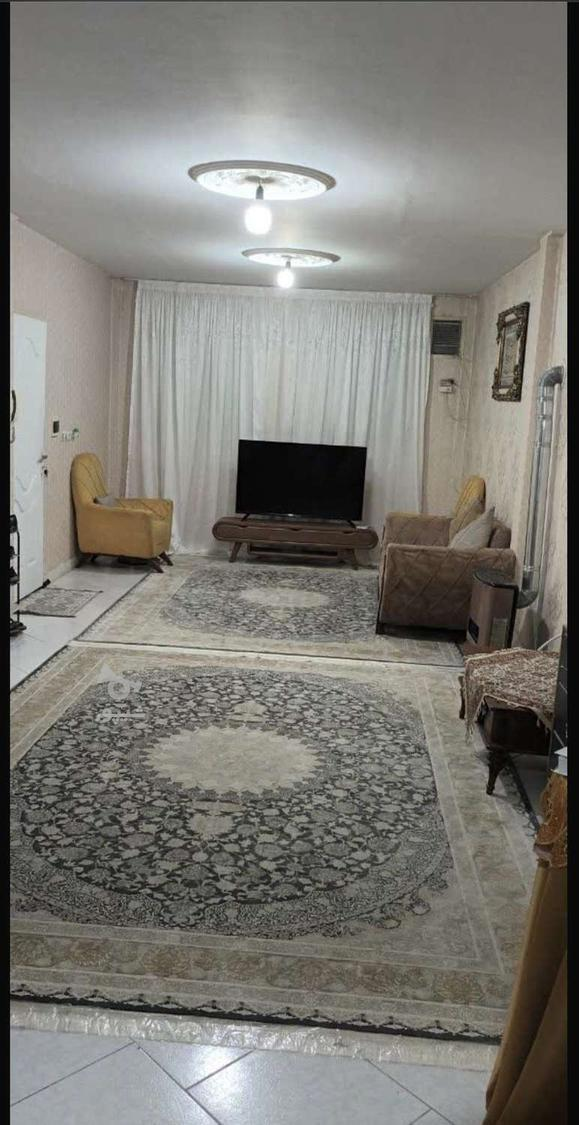

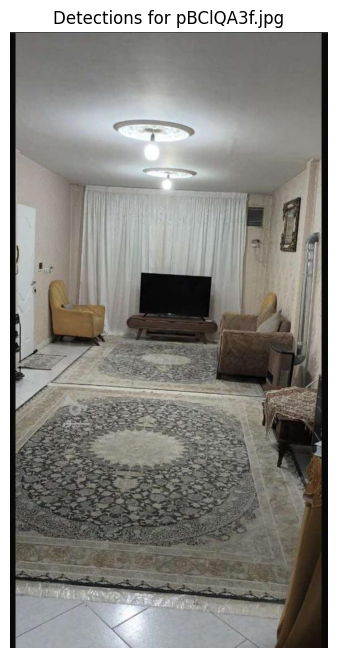

Detecting watermarks in /content/watermark_dataset/images/train/LhZcESfd.jpg

image 1/1 /content/watermark_dataset/images/train/LhZcESfd.jpg: 640x384 (no detections), 80.3ms
Speed: 9.2ms preprocess, 80.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


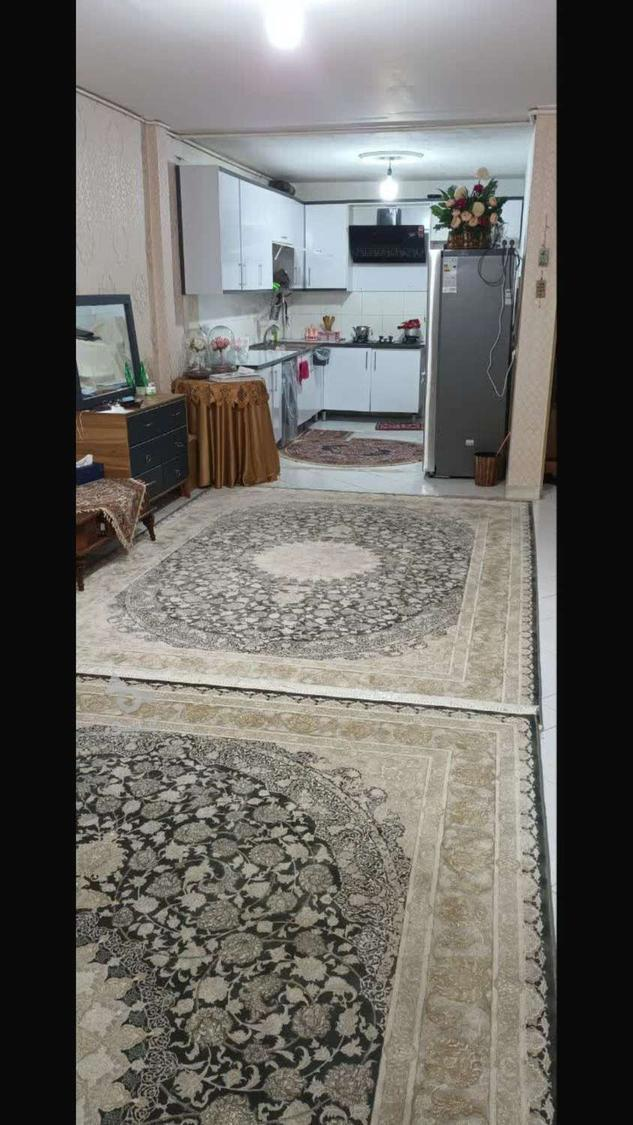

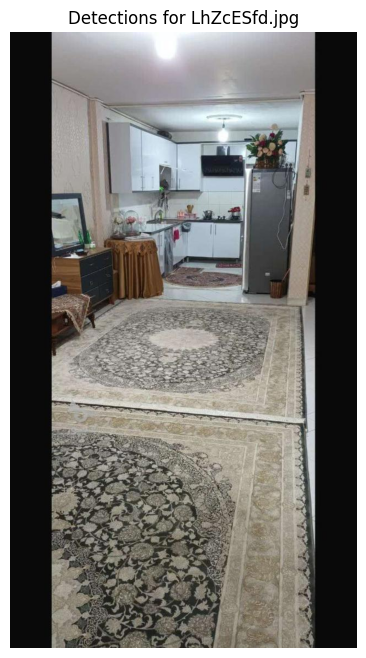

Detecting watermarks in /content/watermark_dataset/images/train/EDdJ8syZ.jpg

image 1/1 /content/watermark_dataset/images/train/EDdJ8syZ.jpg: 640x352 (no detections), 33.5ms
Speed: 9.1ms preprocess, 33.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 352)


In [ ]:
# Install required packages if not already installed
# !pip install ultralytics pillow

import os
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Optional: Enable file upload in Colab or Jupyter
try:
    from google.colab import files
    COLAB = True
except ImportError:
    COLAB = False

# 1. Load your trained YOLOv8 model
model_path = '/content/watermark-detection-yolov8/yolov8-watermark-run2/weights/best.pt'  # update this path if needed
model = YOLO(model_path)

# 2. Prepare a list of test images (default images)
test_images = [
    "/content/watermark_dataset/images/train/pBClQA3f.jpg",
    "/content/watermark_dataset/images/train/LhZcESfd.jpg",
    "/content/watermark_dataset/images/train/EDdJ8syZ.jpg",
    "/content/watermark_dataset/images/train/FyMuaSJV.jpg",
    "/content/watermark_dataset/images/train/26GPXl2M.jpg",
    "/content/watermark_dataset/images/train/D8kJfL4E.jpg"
]

def detect_and_display(image_path):
    results = model(image_path)
    # Show image with detections
    results[0].show()  # Ultralytics will display the image with boxes

    # If you want to display in notebook with matplotlib:
    img = Image.open(image_path).convert("RGB")
    plt.figure(figsize=(8,8))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Detections for {os.path.basename(image_path)}")
    plt.show()

# 3. Run detection on default test images
for img_path in test_images:
    print(f"Detecting watermarks in {img_path}")
    detect_and_display(img_path)

# 4. Optionally, allow user to upload new images and run detection
if COLAB:
    print("Upload new images to test:")
    uploaded = files.upload()
    for filename in uploaded.keys():
        print(f"Detecting watermarks in uploaded image {filename}")
        detect_and_display(filename)

In [ ]:
import os
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# For uploading in notebook/Colab
try:
    from google.colab import files
    COLAB = True
except ImportError:
    COLAB = False

# Path to your trained model
MODEL_PATH = '/content/watermark-detection-yolov8/yolov8-watermark-run2/weights/best.pt'  # adjust if needed
model = YOLO(MODEL_PATH)

# Default images
default_images = [
    "/content/watermark_dataset/images/train/pBClQA3f.jpg",
    "/content/watermark_dataset/images/train/LhZcESfd.jpg",
    "/content/watermark_dataset/images/train/EDdJ8syZ.jpg"
]

def show_detection(image_path):
    results = model(image_path)
    # Show original
    img = Image.open(image_path)
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title('Original')
    plt.axis('off')
    # Show detection
    results[0].show()  # This opens a window if local, but we want to show inline
    # Instead, plot with matplotlib if possible
    plt.subplot(1,2,2)
    plt.imshow(results[0].plot())
    plt.title('Detected Watermark')
    plt.axis('off')
    plt.show()

print("Do you want to upload a new image for detection? (y/n)")
if COLAB:
    user_input = input().strip().lower() if 'get_ipython' not in globals() else 'n'
else:
    user_input = input().strip().lower()

if user_input == 'y':
    if COLAB:
        uploaded = files.upload()
        for filename in uploaded.keys():
            print(f"Detecting watermark in {filename} ...")
            show_detection(filename)
    else:
        print("Upload is only supported in Colab or Jupyter environments.")
else:
    print("Using default images for detection.")
    for img_path in default_images:
        print(f"Detecting watermark in {img_path} ...")
        show_detection(img_path)

## Step 1️: Define a sweep

A W&B Sweep combines a strategy for trying numerous hyperparameter values with the code that evaluates them.
Before you start a sweep, you must define your sweep strategy with a _sweep configuration_.


:::info
The sweep configuration you create for a sweep must be in a nested dictionary if you start a sweep in a Jupyter Notebook.

If you run a sweep within the command line, you must specify your sweep config with a [YAML file](https://docs.wandb.ai/guides/sweeps/define-sweep-configuration).
:::

### Pick a search method

First, specify a hyperparameter search method within your configuration dictionary. [There are three hyperparameter search strategies to choose from: grid, random, and Bayesian search](https://docs.wandb.ai/guides/sweeps/sweep-config-keys#method).

For this tutorial, you will use a random search. Within your notebook, create a dictionary and specify `random` for the `method` key.

In [ ]:
sweep_config = {
    'method': 'random'
    }

Specify a metric that you want to optimize for. You do not need to specify the metric and goal for sweeps that use random search method. However, it is good practice to keep track of your sweep goals because you can refer to it at a later time.

In [ ]:
metric = {
    'name': 'loss',
    'goal': 'minimize'
    }

sweep_config['metric'] = metric

### Specify hyperparameters to search through

Now that you have a search method specified in your sweep configuration, specify the hyperparameters you want to search over.

To do this, specify one or more hyperparameter names to the `parameter` key and specify one or more hyperparameter values for the `value` key.

The values you search through for a given hyperparamter depend on the the type of hyperparameter you are investigating.  

For example, if you choose a machine learning optimizer, you must specify one or more finite optimizer names such as the Adam optimizer and stochastic gradient dissent.

In [ ]:
parameters_dict = {
    'optimizer': {
        'values': ['adam', 'sgd']
        },
    'fc_layer_size': {
        'values': [128, 256, 512]
        },
    'dropout': {
          'values': [0.3, 0.4, 0.5]
        },
    }

sweep_config['parameters'] = parameters_dict

Sometimes you want to track a hyperparameter, but not vary its value. In this case, add the hyperparameter to your sweep configuration and specify the exact value that you want to use. For example, in the following code cell, `epochs` is set to 1.

In [ ]:
parameters_dict.update({
    'epochs': {
        'value': 1}
    })

For a `random` search,
all the `values` of a parameter are equally likely to be chosen on a given run.

Alternatively,
you can specify a named `distribution`,
plus its parameters, like the mean `mu`
and standard deviation `sigma` of a `normal` distribution.

In [ ]:
parameters_dict.update({
    'learning_rate': {
        # a flat distribution between 0 and 0.1
        'distribution': 'uniform',
        'min': 0,
        'max': 0.1
      },
    'batch_size': {
        # integers between 32 and 256
        # with evenly-distributed logarithms
        'distribution': 'q_log_uniform_values',
        'q': 8,
        'min': 32,
        'max': 256,
      }
    })

When we're finished, `sweep_config` is a nested dictionary
that specifies exactly which `parameters` we're interested in trying
and the `method` we're going to use to try them.

Let's see how the sweep configuration looks like:

In [ ]:
import pprint
pprint.pprint(sweep_config)

{'method': 'random',
 'metric': {'goal': 'minimize', 'name': 'loss'},
 'parameters': {'batch_size': {'distribution': 'q_log_uniform_values',
                               'max': 256,
                               'min': 32,
                               'q': 8},
                'dropout': {'values': [0.3, 0.4, 0.5]},
                'epochs': {'value': 1},
                'fc_layer_size': {'values': [128, 256, 512]},
                'learning_rate': {'distribution': 'uniform',
                                  'max': 0.1,
                                  'min': 0},
                'optimizer': {'values': ['adam', 'sgd']}}}


For a full list of configuration options, see [Sweep configuration options](https://docs.wandb.ai/guides/sweeps/sweep-config-keys).

:::tip
For hyperparameters that have potentially infinite options,
it usually makes sense to try out
a few select `values`. For example, the preceding sweep configuration has a list of finite values specified for the `layer_size` and `dropout` parameter keys.
:::

## Step 2️: Initialize the Sweep

Once you've defined the search strategy, it's time to set up something to implement it.

W&B uses a Sweep Controller to manage sweeps on the cloud or locally across one or more machines. For this tutorial, you will use a sweep controller managed by W&B.

While sweep controllers manage sweeps, the component that actually executes a sweep is known as a _sweep agent_.


:::info
By default, sweep controllers components are initiated on W&B's servers and sweep agents, the component that creates sweeps, are activated on your local machine.
:::


Within your notebook, you can activate a sweep controller with the `wandb.sweep` method. Pass your sweep configuration dictionary you defined earlier to the `sweep_config` field:

In [ ]:
sweep_id = wandb.sweep(sweep_config, project="pytorch-sweeps-demo")

Create sweep with ID: b6nm7h5s
Sweep URL: https://wandb.ai/bamudogukovol5-eghlym/pytorch-sweeps-demo/sweeps/b6nm7h5s


The `wandb.sweep` function returns a `sweep_id` that you will use at a later step to activate your sweep.

:::info
On the command line, this function is replaced with
```python
wandb sweep config.yaml
```
:::

For more information on how to create W&B Sweeps in a terminal, see the [W&B Sweep walkthrough](https://docs.wandb.com/sweeps/walkthrough).


## Step 3:  Define your machine learning code

Before you execute the sweep,
define the training procedure that uses the hyperparameter values you want to try. The key to integrating W&B Sweeps into your training code is to ensure that, for each training experiment, that your training logic can access the hyperparameter values you defined in your sweep configuration.

In the proceeding code example, the helper functions `build_dataset`, `build_network`, `build_optimizer`, and `train_epoch` access the sweep hyperparameter configuration dictionary.

Run the proceeding machine learning training code in your notebook. The functions define a basic fully-connected neural network in PyTorch.

In [ ]:
import torch
import torch.optim as optim
import torch.nn.functional as F
import torch.nn as nn
from torchvision import datasets, transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def train(config=None):
    # Initialize a new wandb run
    with wandb.init(config=config):
        # If called by wandb.agent, as below,
        # this config will be set by Sweep Controller
        config = wandb.config

        loader = build_dataset(config.batch_size)
        network = build_network(config.fc_layer_size, config.dropout)
        optimizer = build_optimizer(network, config.optimizer, config.learning_rate)

        for epoch in range(config.epochs):
            avg_loss = train_epoch(network, loader, optimizer)
            wandb.log({"loss": avg_loss, "epoch": epoch})

Within the `train` function, you will notice the following W&B Python SDK methods:
* [`wandb.init()`](https://docs.wandb.com/library/init) – Initialize a new W&B run. Each run is a single execution of the training function.
* [`wandb.config`](https://docs.wandb.com/library/config) – Pass sweep configuration with the hyperparameters you want to experiment with.
* [`wandb.log()`](https://docs.wandb.com/library/log) – Log the training loss for each epoch.


The proceeding cell defines four functions:
`build_dataset`, `build_network`, `build_optimizer`, and `train_epoch`.
These functions are a standard part of a basic PyTorch pipeline,
and their implementation is unaffected by the use of W&B.

In [ ]:
def build_dataset(batch_size):

    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.1307,), (0.3081,))])
    # download MNIST training dataset
    dataset = datasets.MNIST(".", train=True, download=True,
                             transform=transform)
    sub_dataset = torch.utils.data.Subset(
        dataset, indices=range(0, len(dataset), 5))
    loader = torch.utils.data.DataLoader(sub_dataset, batch_size=batch_size)

    return loader


def build_network(fc_layer_size, dropout):
    network = nn.Sequential(  # fully-connected, single hidden layer
        nn.Flatten(),
        nn.Linear(784, fc_layer_size), nn.ReLU(),
        nn.Dropout(dropout),
        nn.Linear(fc_layer_size, 10),
        nn.LogSoftmax(dim=1))

    return network.to(device)


def build_optimizer(network, optimizer, learning_rate):
    if optimizer == "sgd":
        optimizer = optim.SGD(network.parameters(),
                              lr=learning_rate, momentum=0.9)
    elif optimizer == "adam":
        optimizer = optim.Adam(network.parameters(),
                               lr=learning_rate)
    return optimizer


def train_epoch(network, loader, optimizer):
    cumu_loss = 0
    for _, (data, target) in enumerate(loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()

        # ➡ Forward pass
        loss = F.nll_loss(network(data), target)
        cumu_loss += loss.item()

        # ⬅ Backward pass + weight update
        loss.backward()
        optimizer.step()

        wandb.log({"batch loss": loss.item()})

    return cumu_loss / len(loader)

For more details on instrumenting W&B with PyTorch, see [this Colab](https://colab.research.google.com/github/wandb/examples/blob/master/colabs/pytorch/Simple_PyTorch_Integration.ipynb).

## Step 4: Activate sweep agents
Now that you have your sweep configuration defined and a training script that can utilize those hyperparameter in an interactive way, you are ready to activate a sweep agent. Sweep agents are responsible for running an experiment with a set of hyperparameter values that you defined in your sweep configuration.

Create sweep agents with the `wandb.agent` method. Provide the following:
1. The sweep the agent is a part of (`sweep_id`)
2. The function the sweep is supposed to run. In this example, the sweep will use the `train` function.
3. (optionally) How many configs to ask the sweep controller for (`count`)

:::tip
You can start multiple sweep agents with the same `sweep_id`
on different compute resources. The sweep controller ensures that they work together
according to the sweep configuration you defined.
:::

The proceeding cell activates a sweep agent that runs the training function (`train`) 5 times:

In [ ]:
wandb.agent(sweep_id, train, count=5)

wandb: Agent Starting Run: 01zygc8n with config:
wandb: 	batch_size: 152
wandb: 	dropout: 0.3
wandb: 	epochs: 1
wandb: 	fc_layer_size: 512
wandb: 	learning_rate: 0.005823601574082727
wandb: 	optimizer: sgd


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 15.2MB/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 515kB/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



 56%|█████▌    | 918k/1.65M [00:00<00:00, 2.20MB/s]

:::info
Since the `random` search method was specified in the sweep configuration, the sweep controller provides randomly-generated hyperparameter values.
:::

For more information on how to create W&B Sweeps in a terminal, see the [W&B Sweep walkthrough](https://docs.wandb.com/sweeps/walkthrough).

## Visualize Sweep Results



### Parallel Coordinates Plot
This plot maps hyperparameter values to model metrics. It’s useful for honing in on combinations of hyperparameters that led to the best model performance.

![](https://assets.website-files.com/5ac6b7f2924c652fd013a891/5e190366778ad831455f9af2_s_194708415DEC35F74A7691FF6810D3B14703D1EFE1672ED29000BA98171242A5_1578695138341_image.png)


### Hyperparameter Importance Plot
The hyperparameter importance plot surfaces which hyperparameters were the best predictors of your metrics.
We report feature importance (from a random forest model) and correlation (implicitly a linear model).

![](https://assets.website-files.com/5ac6b7f2924c652fd013a891/5e190367778ad820b35f9af5_s_194708415DEC35F74A7691FF6810D3B14703D1EFE1672ED29000BA98171242A5_1578695757573_image.png)

These visualizations can help you save both time and resources running expensive hyperparameter optimizations by honing in on the parameters (and value ranges) that are the most important, and thereby worthy of further exploration.


## Learn more about W&B Sweeps

We created a simple training script and [a few flavors of sweep configs](https://github.com/wandb/examples/tree/master/examples/keras/keras-cnn-fashion) for you to play with. We highly encourage you to give these a try.

That repo also has examples to help you try more advanced sweep features like [Bayesian Hyperband](https://app.wandb.ai/wandb/examples-keras-cnn-fashion/sweeps/us0ifmrf?workspace=user-lavanyashukla), and [Hyperopt](https://app.wandb.ai/wandb/examples-keras-cnn-fashion/sweeps/xbs2wm5e?workspace=user-lavanyashukla).